### 1. Reading, Understanding and Visualizing the Dataset

In [1]:
import numpy as np
import pandas as pd
import os

In [3]:
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input\.RData
../input\.RDataTmp
../input\.Rhistory
../input\ADNIMERGE.csv
../input\adstrd_master.csv
../input\aptPrice.csv
../input\b1.txt
../input\b2.txt
../input\bank.csv
../input\bike_test.csv
../input\bike_train.csv
../input\boston_missing.csv
../input\card.csv
../input\card_food.csv
../input\card_food_date.csv
../input\card_food_value_count.csv
../input\card_hobby.csv
../input\card_med.csv
../input\Case.csv
../input\corona_미용.csv
../input\corona_음식.csv
../input\corona_의료.csv
../input\corona_취미학원.csv
../input\CovidCase.csv
../input\CovidPatientInfo.csv
../input\CovidPolicy.csv
../input\CovidRegion.csv
../input\CovidTime.csv
../input\CovidTimeAge.csv
../input\CovidTimeGender.csv
../input\CovidTimeProvince.csv
../input\COVID_eng_kor_table.xlsx
../input\data_loader.py
../input\delivery.csv
../input\evaluate_half_tensor.py
../input\ex1.csv
../input\ex2.csv
../input\ex3.csv
../input\ex4.csv
../input\ex5.csv
../input\ex6.xlsx
../input\example.csv
../input\food_order.xlsx
../input\fpop

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('../input/letter-recognition.csv')
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [7]:
data.shape

(20000, 17)

In [8]:
print(data.columns)

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')


In [9]:
sequence = list(np.sort(data['letter'].unique()))
print(sequence)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [10]:
data_mean = data.groupby('letter').mean()
data_mean.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510


### 2. Data Preparation

In [11]:
X = data.drop(['letter'], axis=1)
y = data['letter']

In [12]:
# Scaling
from sklearn.preprocessing import scale
X = scale(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=101)

### 3. Training a model

In [14]:
from sklearn.svm import SVC

# building a linear SVM model
linear = SVC(kernel='linear')
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# accuracy and confusion matrix
print('accuracy : ', metrics.accuracy_score(y_true=y_test, y_pred=y_pred), '\n')
print('confusion matrix : ', metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy :  0.8523333333333334 

confusion matrix :  [[198   0   0   0   0   0   1   1   0   1   1   1   0   0   0   0   0   1
    0   1   1   0   0   0   3   0]
 [  0 188   0   3   0   1   3   3   1   0   1   0   0   2   0   1   1   9
    3   0   0   1   0   1   0   0]
 [  1   0 200   0   7   0  12   1   0   0   5   0   0   0   3   0   0   0
    0   0   1   0   0   0   0   0]
 [  1  15   0 210   0   1   2   2   1   0   1   0   1   5   3   0   0   5
    0   1   0   0   0   0   0   0]
 [  0   1   3   0 204   2   6   1   0   0   1   5   0   0   0   0   2   2
    1   2   0   0   0   1   0   3]
 [  0   0   0   1   1 201   1   2   1   1   0   0   0   2   0   2   0   0
    3   7   1   0   1   0   1   0]
 [  0   1   9   4   2   2 167   1   0   1   4   3   1   0   1   0   9   1
    8   0   0   2   3   0   0   0]
 [  0   7   3  11   0   4   3 141   0   2   4   1   2   0  12   0   4  12
    0   0   4   2   0   4   1   0]
 [  0   0   2   3   0   6   0   0 184   9   0   0   0   0   1   0   0   0
 

In [16]:
non_linear = SVC(kernel='rbf')
non_linear.fit(X_train, y_train)

# predict
y_pred = non_linear.predict(X_test)

In [17]:
# accuracy and confusion matrix for non-linear SVM model
print("accuracy :", metrics.accuracy_score(y_true = y_test,y_pred = y_pred), "\n")
print("confusion_matrix :", metrics.confusion_matrix(y_true = y_test,y_pred = y_pred))

accuracy : 0.9383333333333334 

confusion_matrix : [[205   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   2   0]
 [  0 205   0   3   1   0   1   0   0   0   0   0   0   0   0   0   0   6
    1   0   0   0   0   1   0   0]
 [  0   0 213   0   5   0   7   1   0   0   0   0   0   0   4   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   4   0 234   0   0   1   3   0   0   0   0   0   3   1   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 221   1   9   0   0   0   0   0   0   0   0   0   0   1
    0   0   0   0   0   0   0   2]
 [  0   0   0   1   0 215   1   1   1   0   0   0   0   1   0   1   0   0
    1   3   0   0   0   0   0   0]
 [  0   0   3   4   1   1 202   0   0   0   0   1   1   0   2   0   0   1
    0   0   0   1   2   0   0   0]
 [  0   7   0   5   0   0   4 177   0   0   2   0   1   0   3   0   4  13
    0   0   1   0   0   0   0   0]
 [  0   0   1   1   0   3   0   0 194  11   0   0   0   0   0   1   0   0
   

### 4. Hypertuning using Grid-Search

In [18]:
# hypertuning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# creating a KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=101)

# specify range of hyperparameters
# set the parameters by cross-validation
hyper_params = [{'gamma': [1e-2, 1e-3, 1e-4],
                'C': [1, 10, 100, 1000]}]

# specify model
model = SVC(kernel='rbf')

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model,
                       param_grid = hyper_params,
                       scoring='accuracy',
                       cv=folds,
                       verbose=1,
                       return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  9.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [19]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.905905,0.042394,1.415347,0.043146,1,0.01,"{'C': 1, 'gamma': 0.01}",0.826429,0.834643,0.828571,...,0.832714,0.006221,7,0.843929,0.844196,0.847679,0.843571,0.844018,0.844679,0.001514
1,4.065313,0.063075,1.777101,0.028366,1,0.001,"{'C': 1, 'gamma': 0.001}",0.684643,0.672500,0.682500,...,0.677214,0.005622,10,0.682054,0.683125,0.687946,0.679554,0.686429,0.683821,0.003021
2,9.677701,1.252395,2.069475,0.158800,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.203929,0.207143,0.206429,...,0.217571,0.014490,12,0.212679,0.217589,0.228393,0.240625,0.240625,0.227982,0.011507
3,2.369390,0.608855,1.272294,0.097509,10,0.01,"{'C': 10, 'gamma': 0.01}",0.914643,0.908571,0.902500,...,0.911214,0.005654,3,0.929643,0.929464,0.930357,0.928929,0.928125,0.929304,0.000746
4,2.331588,0.220465,2.187241,0.885696,10,0.001,"{'C': 10, 'gamma': 0.001}",0.805714,0.809643,0.803571,...,0.808929,0.006227,8,0.818125,0.817679,0.819643,0.814375,0.819464,0.817857,0.001897
5,5.015554,0.666169,1.991363,0.061669,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.684286,0.671071,0.682500,...,0.677000,0.005788,11,0.681875,0.683304,0.687500,0.680089,0.685446,0.683643,0.002608
6,1.630775,0.044484,0.773728,0.045932,100,0.01,"{'C': 100, 'gamma': 0.01}",0.948571,0.946786,0.941429,...,0.947786,0.003742,2,0.978482,0.977946,0.978393,0.978661,0.978571,0.978411,0.000249
7,1.787755,0.282396,1.109099,0.063640,100,0.001,"{'C': 100, 'gamma': 0.001}",0.861071,0.866071,0.850357,...,0.863357,0.008074,5,0.879554,0.877143,0.882143,0.875536,0.879464,0.878768,0.002262
8,2.169980,0.034982,1.468804,0.013171,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.801071,0.806429,0.803929,...,0.805714,0.006140,9,0.813571,0.812679,0.814286,0.810000,0.815357,0.813179,0.001815
9,1.860156,0.050385,0.671083,0.035652,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.953571,0.949643,0.948571,...,0.951714,0.002183,1,0.997054,0.997768,0.997411,0.997321,0.997232,0.997357,0.000237


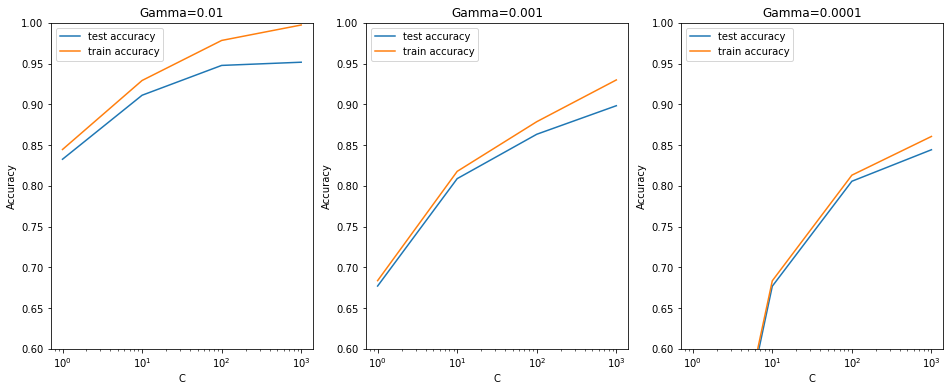

In [21]:
# Converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# plotting
plt.figure(figsize=(16, 6))

# subplot 1/3
plt.subplot(131)
gamma = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma['param_C'], gamma['mean_test_score'])
plt.plot(gamma['param_C'], gamma['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.01')
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma2 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma2['param_C'], gamma2['mean_test_score'])
plt.plot(gamma2['param_C'], gamma2['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.001')
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
gamma3 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma3['param_C'], gamma3['mean_test_score'])
plt.plot(gamma3['param_C'], gamma3['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Gamma=0.0001')
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

<b>Observations - </b>

1. When the value of Gamma is low then accuracy is also quite low.
2. Gamma value increases, accuracy also increases.
3. Accordingly we will be select the C- values.

In [22]:
# print the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print('The best test score is {0} corresponding to hyperparameters {1}'.format(best_score, best_hyperparams))

The best test score is 0.9517142857142857 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


### 5. Building and Evaluating a final model with optimal C and gamma value

In [23]:
# Building and Evaluating a final model
# model with optimal hyperparameters

# model
model = SVC(C=1000, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9596666666666667 

[[206   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   2   0]
 [  0 211   0   2   1   0   1   0   0   0   0   0   0   0   0   0   0   1
    2   0   0   0   0   0   0   0]
 [  0   0 220   0   3   0   4   1   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   0 236   0   1   0   1   0   1   0   0   0   2   2   0   0   1
    1   0   0   0   0   0   0   0]
 [  0   0   1   0 225   1   4   0   0   0   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   2]
 [  0   0   0   1   0 217   0   0   1   1   0   0   0   1   0   3   0   0
    0   0   0   1   0   0   0   0]
 [  0   0   2   3   1   0 209   0   0   0   0   0   1   0   1   0   0   0
    0   0   0   1   1   0   0   0]
 [  0   1   3   5   0   0   2 195   1   1   2   1   1   0   1   0   3   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0 203   8   0   0   0   0   0   0   1   0
    0   0   0   0   0   